In [48]:
%matplotlib inline
import random
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
from sklearn.model_selection import KFold
import matplotlib
matplotlib.rcParams['figure.figsize'] = (16, 10)
tqdm.pandas()

In [6]:
def get_preds(arr):
    mask = arr == 0
    return np.clip(np.where(mask.any(1), mask.argmax(1), 5) - 1, 0, 4)

seed = 71
df = pd.read_csv('../preprocessed/strMd5.csv')
df = df[df.diagnosis.notnull()].drop_duplicates(subset='strMd5')
df['diagnosis'] = df.diagnosis.astype(int)
df = df.reset_index(drop=True)

df['width'] = df.id_code.apply(lambda x: Image.open(f"../input/train/{x}.png").size[0])
df['height'] = df.id_code.apply(lambda x: Image.open(f"../input/train/{x}.png").size[1])
df['im_size'] = df.width.astype(str) + "_" + df.height.astype(str)

y = df.diagnosis
mskf = KFold(n_splits=5, random_state=seed)
splitter = mskf.split(df.id_code, y)
for i in range(5):
    pred = np.load(f'../result/2019_07_28_03_12_32/val_preds_{i}.npy')
    tr_ind, te_ind = next(splitter)
    print(len(te_ind), len(pred))
    df.loc[te_ind, 'pred'] = pred

707 707
707 707
707 707
707 707
706 706


In [38]:
df.shape

(3534, 11)

In [8]:
df['loss'] = np.abs(df.diagnosis - df.pred)

In [19]:
worst = df.sort_values('loss', ascending=False).head(100)

In [57]:
best4 = df[df.diagnosis == 4].sort_values('loss').head(100)

In [74]:
df.sort_values('loss', ascending=False).head(300).min()

id_code                                   0243404e8a00
diagnosis                                            0
strMd5                00411449bb17208728235e6e0f36c92a
strMd5_count                                         1
strMd5_train_count                                   1
strMd5_nunique                                       1
width                                              474
height                                             358
im_size                                      1050_1050
pred                                         -0.153379
loss                                          0.994406
dtype: object

In [78]:
df.sort_values('loss').head(3234)

,id_code,diagnosis,strMd5,strMd5_count,strMd5_train_count,strMd5_nunique,width,height,im_size,pred,loss
1182,52ddde91a349,0,2e286bf00f78f49b97f9a93cb39f743c,1,1,1,1050,1050,1050_1050,0.000058,0.000058
3264,e9ff9352ccb3,1,26cf5a38e8ac56cd864f2b3f2836c0cd,1,1,1,4288,2848,4288_2848,0.999870,0.000130
990,484dbeb9bf2a,0,00f5e31b71dc37008b8fa977d78802d5,1,1,1,2048,1536,2048_1536,-0.000151,0.000151
275,1509d097b69a,0,1976bf6564ad23d6467b23bb0d05c418,1,1,1,1050,1050,1050_1050,-0.000161,0.000161
2412,ababe19ed448,1,740b4b709c71e37ab547921c308b6407,1,1,1,2588,1958,2588_1958,0.999815,0.000185
108,0851d6a69589,0,675bcbae8db089338066403f41c4fd79,1,1,1,1050,1050,1050_1050,-0.000297,0.000297
1108,4ef16a53d899,0,e3d24da8385e619345cac2ff4eea32b1,1,1,1,819,614,819_614,0.000389,0.000389
1464,682312e82ee3,0,ab667d9026d269d7059419cdf7cbf838,1,1,1,2588,1958,2588_1958,0.000576,0.000576
3212,e62490b7d0e9,4,4f152916b17adaf2452319e04d47c9da,1,1,1,3216,2136,3216_2136,4.000600,0.000600
1153,51af8a689511,0,3533277abacfec20429ac51ec71efe48,1,1,1,1050,1050,1050_1050,0.000686,0.000686


In [55]:
df.diagnosis.value_counts()

0    1798
2     934
1     341
4     279
3     182
Name: diagnosis, dtype: int64

In [35]:
error = df.query("diagnosis != pred")

In [36]:
error = error[error.pred.notnull()]

22895c89792f 256 256 4 4.037748336791992 0.03774833679199219


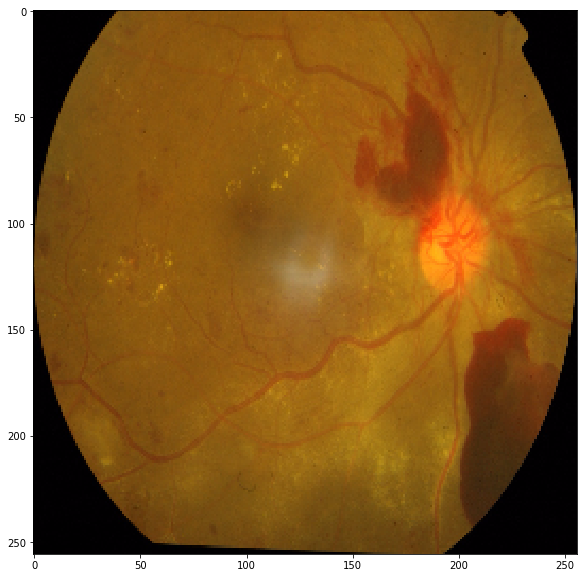

In [67]:
# df = pd.read_csv('../input/train.csv')
# index = random.randint(0, len(error))
index = random.choice(best4.index)
fname = df.iloc[index].id_code
label = df.iloc[index].diagnosis
pred = df.iloc[index].pred
loss = df.iloc[index].loss
im = np.load(f"../preprocessed/train_crop/{fname}.npy")
width, height = im.shape[0], im.shape[1]
print(fname, width, height, label, pred, loss) 
plt.imshow(np.asarray(im))

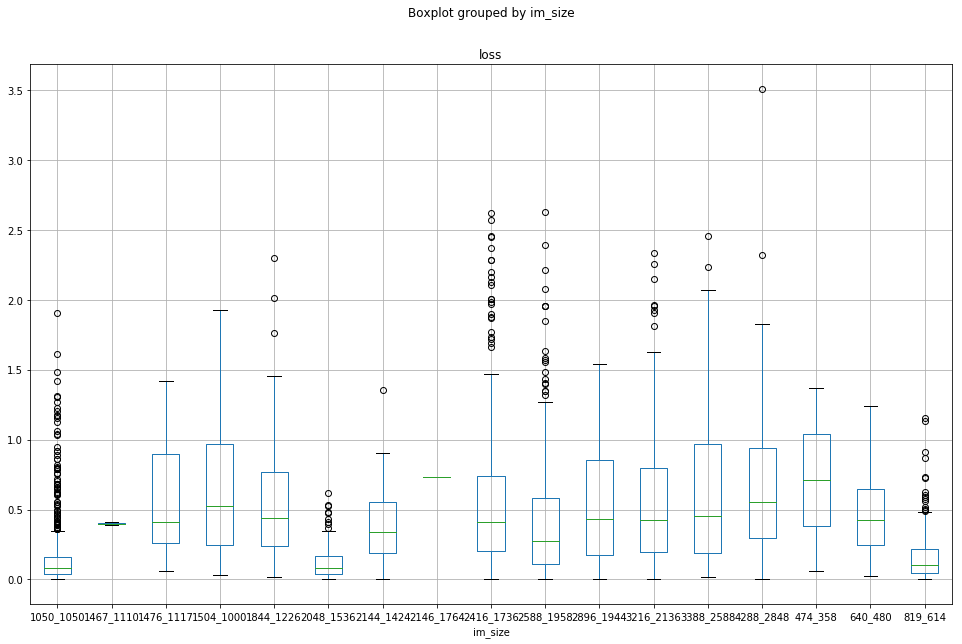

In [49]:
df.boxplot(by='im_size', column='loss')

62318d514160 256 256 4 3.267472743988037 0.7325272560119629


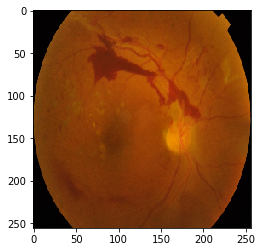

In [37]:
index = random.choice(df[df.diagnosis == 4].index)
fname = df.iloc[index].id_code
label = df.iloc[index].diagnosis
pred = df.iloc[index].pred
loss = df.iloc[index].loss
im = np.load(f"../preprocessed/train_crop/{fname}.npy")
width, height = im.shape[0], im.shape[1]
print(fname, width, height, label, pred, loss) 
plt.imshow(np.asarray(im))

In [22]:
x = df[df.pred.notnull()]

In [69]:
im_info = np.stack(x.id_code.progress_apply(lambda x: np.array(Image.open(f"../input/train/{x}.png")).mean((0, 1))))

In [71]:
x[['r_mean', 'g_mean', 'b_mean']] = pd.DataFrame(im_info)

/home/iwai/anaconda3/envs/kaggle/lib/python3.6/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [82]:
x['miss'] = x.pred != x.diagnosis

/home/iwai/anaconda3/envs/kaggle/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f579f1a7c88>,
      dtype=object)

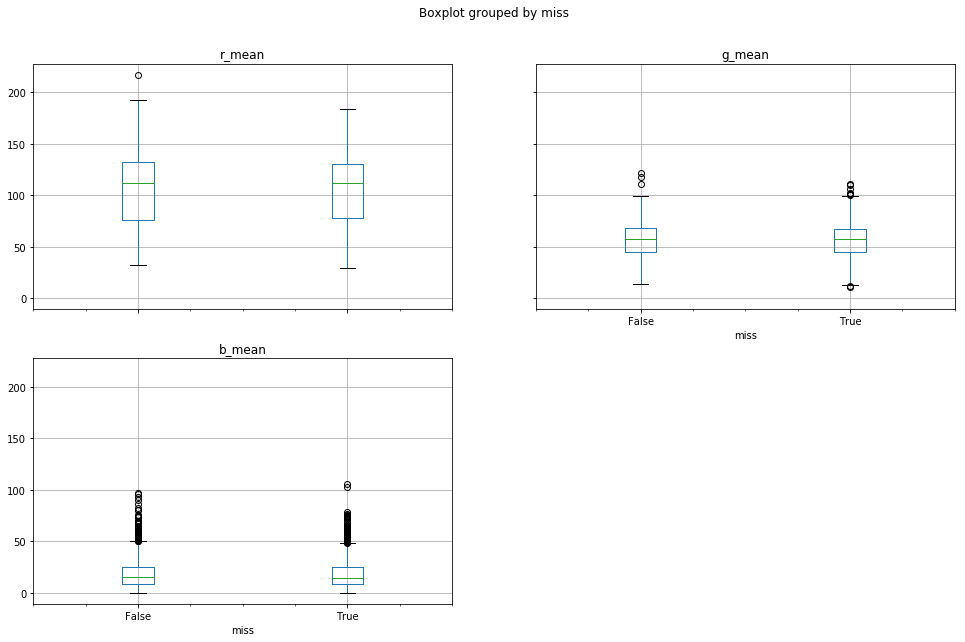

In [73]:
x.boxplot(column=['r_mean', 'g_mean', 'b_mean'], by='miss')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f579edaff98>,
      dtype=object)

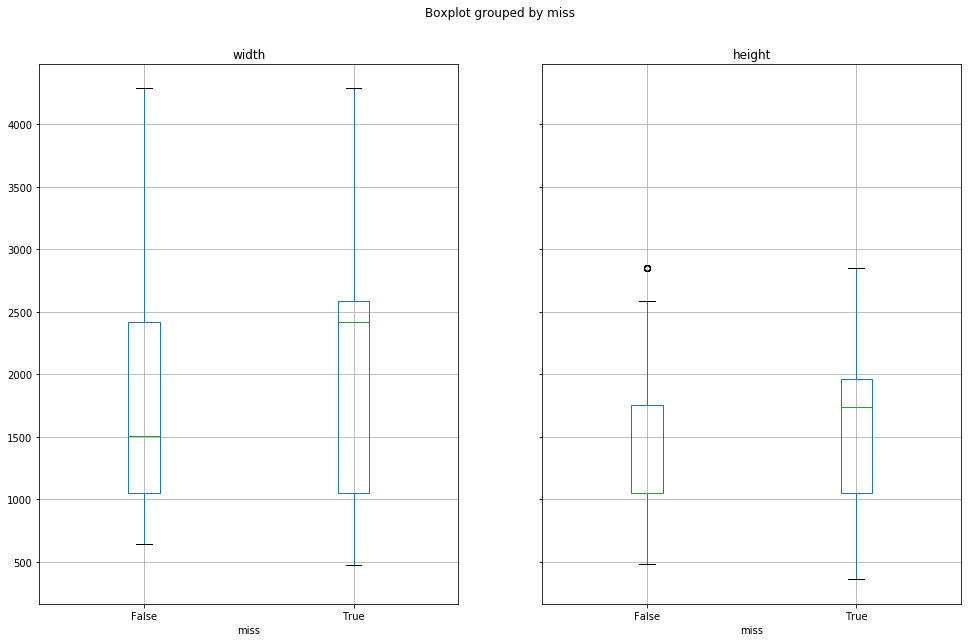

In [78]:
x.boxplot(column=['width', 'height'], by='miss')

In [85]:
pd.crosstab(x.diagnosis, x.miss)

miss,False,True
diagnosis,,
0,980,757
1,43,304
2,314,646
3,20,168
4,33,255
